In [6]:
from pathlib import Path

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Konfigurieren von Variablen

In [7]:
img_dir = Path("../../data/images/")

# Grundlegende Kenngrößen eines digitalen Bildes

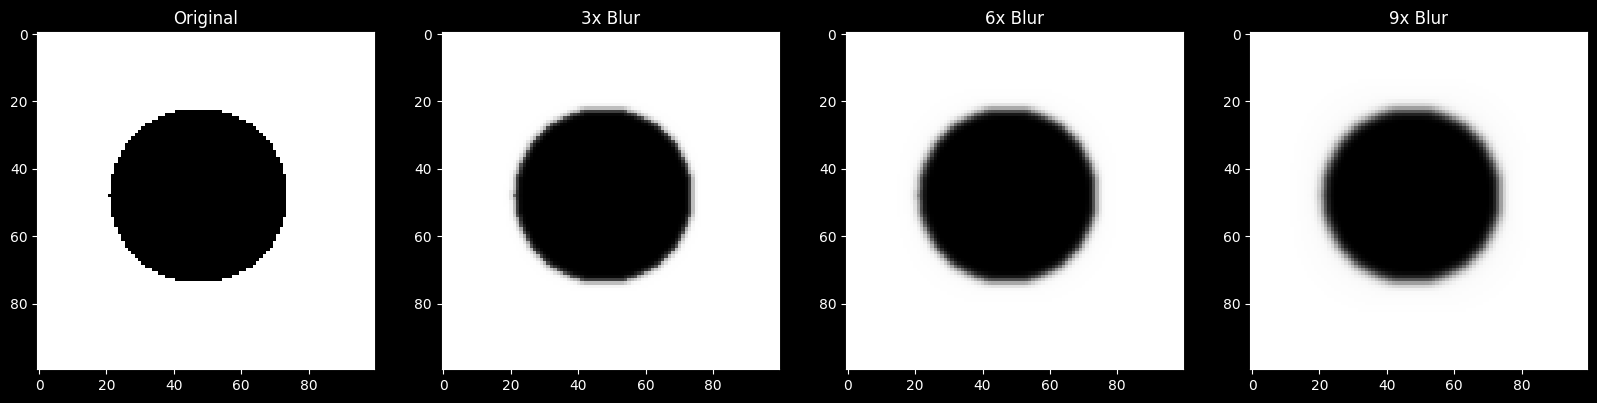

In [8]:
img_circle1 = cv.imread(str(img_dir / "circle_0.bmp"), cv.IMREAD_GRAYSCALE)
img_circle2 = cv.imread(str(img_dir / 'circle_3.bmp'), cv.IMREAD_GRAYSCALE)
img_circle3 = cv.imread(str(img_dir / 'circle_6.bmp'), cv.IMREAD_GRAYSCALE)
img_circle4 = cv.imread(str(img_dir / 'circle_9.bmp'), cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.imshow(img_circle1, cmap='gray')
plt.title('Original')
plt.subplot(1,4,2)
plt.imshow(img_circle2, cmap='gray')
plt.title('3x Blur')
plt.subplot(1,4,3)
plt.imshow(img_circle3, cmap='gray')
plt.title('6x Blur')
plt.subplot(1,4,4)
plt.imshow(img_circle4, cmap='gray')
plt.title('9x Blur')
plt.show()

In [13]:
# Funktion zur Berechnung des Mittelwertes eines Bildes img
def calc_mean(img): 
    w = len(img[0])
    h = len(img)

    summe = 0
    
    for i in range(h):
        for j in range(w):
            summe += img[i][j]
            
    return summe / (w * h)

In [14]:
# Berechne Mittelwert für alle Bilder
mean = [calc_mean(img_circle1), calc_mean(img_circle2), calc_mean(img_circle3), calc_mean(img_circle4)]
mean = np.round(mean, 2)
print('Mittelwerte der 4 Bilder: ', mean)

Mittelwerte der 4 Bilder:  [200.3  200.19 199.92 199.51]


In [15]:
# Funktion zur Berechnung der Varianz eines Bildes img mit gegebenem Mittelwert mean
def calc_var(img, mean): 
    w = len(img[0])
    h = len(img)

    summe = 0

    for i in range(h):
        for j in range(w):
            summe += (img[i][j] - mean)**2
    
    return summe / (w * h)

In [16]:
# Berechne Varianz für alle Bilder
var = [calc_var(img_circle1, mean[0]), calc_var(img_circle2, mean[1]), 
       calc_var(img_circle3, mean[2]), calc_var(img_circle4, mean[3])]
var = np.round(var, 2)
print('Varianz der 4 Bilder: ', var)

Varianz der 4 Bilder:  [10956.05 10473.71 10256.53 10089.23]


Dieser Varianzvergleich wird auch beim kontrastbestimmten Autofokus verwendet. Hierbei gilt die Annahme, dass ein Bild genau dann am schärfsten ist, wenn seine Varianz am höchsten ist. Dies führt in diesem Beispiel dazu, dass Bild 1 gewählt worden wäre.